In [9]:
#load module
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
dataset = pd.read_csv('dataset.csv')
del_features=['Symbol','Series','Turnover','Trades']
for i in range(len(del_features)):
    del_feature=del_features[i]
    dataset.pop(del_feature)
print(dataset)

            Date  Prev Close    Open     High     Low   Last   Close    VWAP  \
0     2007-11-27      440.00  770.00  1050.00  770.00  959.0  962.90  984.72   
1     2007-11-28      962.90  984.00   990.00  874.00  885.0  893.90  941.38   
2     2007-11-29      893.90  909.00   914.75  841.00  887.0  884.20  888.09   
3     2007-11-30      884.20  890.00   958.00  890.00  929.0  921.55  929.17   
4     2007-12-03      921.55  939.75   995.00  922.00  980.0  969.30  965.65   
...          ...         ...     ...      ...     ...    ...     ...     ...   
3317  2021-04-26      725.35  733.00   739.65  728.90  729.2  730.75  733.25   
3318  2021-04-27      730.75  735.00   757.50  727.35  748.6  749.15  747.67   
3319  2021-04-28      749.15  755.00   760.00  741.10  743.4  746.25  751.02   
3320  2021-04-29      746.25  753.20   765.85  743.40  746.4  746.75  753.06   
3321  2021-04-30      746.75  739.00   759.45  724.50  726.4  730.05  743.35   

        Volume  Deliverable Volume  %De

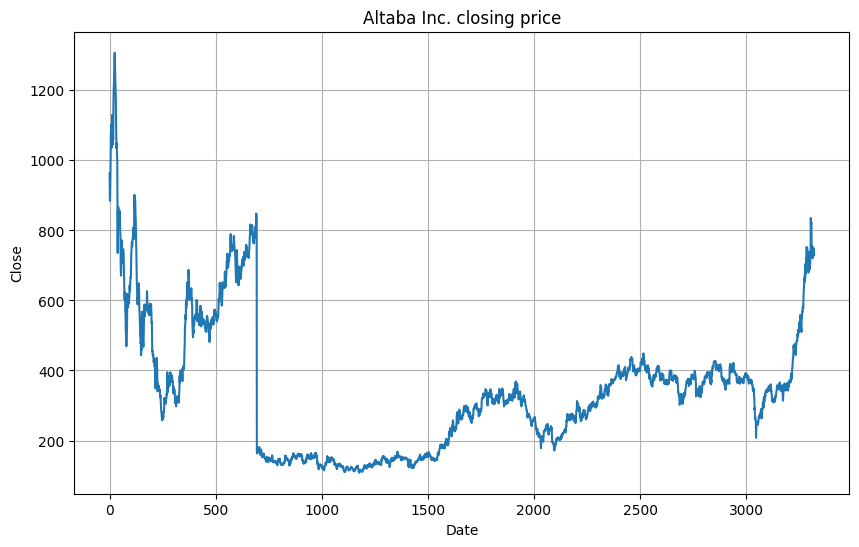

In [10]:
#plot stock price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(dataset['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

In [11]:
#training set
import math
close_prices = dataset['Close']
values = close_prices.values

training_data_len = math.ceil(len(values)* 0.8)
#normalization
'''
Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. 
To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.
'''
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]
#Incorporating Timesteps Into Data
'''
We should input our data in the form of a 3D array to the LSTM model. 
First, we create data in 60 timesteps before using numpy to convert it into an array. 
Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.
'''
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(2598, 60, 1)


In [12]:
# test set 
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(664, 60, 1)

In [13]:
n_train_rows = int(dataset.shape[0]*.8)-1
# Split into train and test sets but keep all 9 columns
train = dataset.iloc[:n_train_rows, :]
test = dataset.iloc[n_train_rows:, :]
print(train,test.shape)

            Date  Prev Close    Open     High     Low    Last   Close    VWAP  \
0     2007-11-27      440.00  770.00  1050.00  770.00  959.00  962.90  984.72   
1     2007-11-28      962.90  984.00   990.00  874.00  885.00  893.90  941.38   
2     2007-11-29      893.90  909.00   914.75  841.00  887.00  884.20  888.09   
3     2007-11-30      884.20  890.00   958.00  890.00  929.00  921.55  929.17   
4     2007-12-03      921.55  939.75   995.00  922.00  980.00  969.30  965.65   
...          ...         ...     ...      ...     ...     ...     ...     ...   
2651  2018-08-09      374.60  376.00   381.00  371.55  377.30  378.00  378.00   
2652  2018-08-10      378.00  377.30   382.10  376.00  378.55  379.30  379.05   
2653  2018-08-13      379.30  378.00   379.60  374.65  377.55  377.15  377.11   
2654  2018-08-14      377.15  377.55   378.70  371.00  372.35  373.15  373.90   
2655  2018-08-16      373.15  372.00   374.10  367.30  370.05  370.30  370.57   

        Volume  Deliverable

In [14]:
#LSTM model

model = keras.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(128, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 201,395
Trainable params: 201,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
2598/2598 [==============================] - 58s 21ms/step - loss: 0.0013
Epoch 2/3
2598/2598 [==============================] - 59s 23ms/step - loss: 5.7340e-04
Epoch 3/

In [15]:
# Making Predictions on the Test Set

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 3s 49ms/step


C:\Users\JW\AppData\Local\Temp\ipykernel_9980\3013344396.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


         col1    col2
0  397.783722  377.95
1  396.993469  384.50
2  402.522614  376.75
3  396.663940  378.65
4  400.216797  386.95


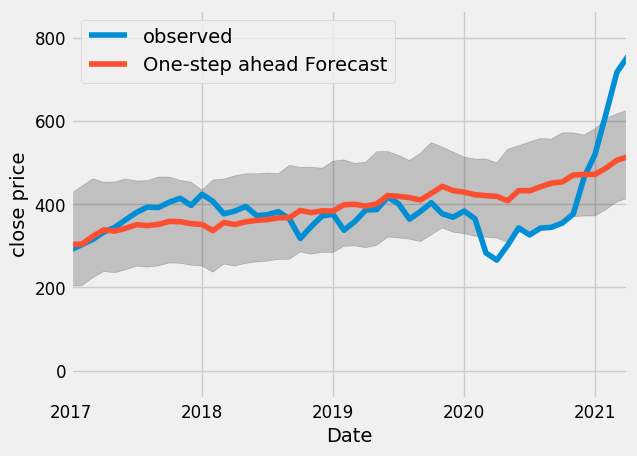

In [78]:
'''After all these steps, 
we can use matplotlib to visualize the result of our predicted stock price and the actual stock price.'''
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
diff1=250
diff2=10
# Importing the Dataset.
stock=pd.read_csv("dataset.csv")
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')
cols = ['Symbol','Series','Prev Close','Open','High', 'Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')
stock = stock.groupby('Date')['Close'].sum().reset_index()
stock = stock.set_index('Date')
stock.index = pd.to_datetime(stock.index)
monthly_mean = stock.Close.resample('M').mean()
data = dataset.filter(['Close'])
train = data[:training_data_len]

validation = data[training_data_len:]
tr=validation['Close'].values.tolist()
validation['Predictions'] = predictions
pred=validation['Predictions'].values.tolist()
pred1 = [x-150 for x in pred]
from operator import add
pred=[j for sub in predictions for j in sub]
df = pd.DataFrame(data=d)
print(df.head(5))
ax = monthly_mean['2017':].plot(label='observed')
ax.fill_between(df.index,
                df.iloc[:, 0]-diff1,
                df.iloc[:, 1]-diff2, color='k', alpha=.2)
plt.plot(pred1,label='One-step ahead Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()
plt.show()

In [17]:
# Evaluating the prediciton using RMSE, MAE and R2 score.

print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('MAPE:', np.mean(np.abs(predictions-y_test)/np.abs(y_test)))
print('R-Squared', r2_score(y_test, predictions))

Root Mean Square Error: 28.203247179896252
Mean Absolute Error: 22.850060938639817
MAPE: 0.2633979431982778
R-Squared 0.931667131370068


In [18]:
print(len(test_data))
x_input=test_data[714:].reshape(1,-1)
print(x_input.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(len(temp_input))

724
(1, 10)
10


In [81]:
# demonstrate prediction for next 30 days
from numpy import array
lst_output=[]
n_steps=282
i=0
while(i<30):    
    if(len(temp_input)>90):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        print(i,y_hat)
print(lst_output)

dd


KeyboardInterrupt: 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,401)

In [ ]:
pred=scaler.inverse_transform(lst_output)
pred_list=[]
for i in range(300):
    pred_list.append(pred[i])
print(pred_list)

IndexError: index 30 is out of bounds for axis 0 with size 30

30
                          Close
Date                           
2021-04-30  [703.9532548159361]
2021-05-01  [702.0344597935677]
2021-05-02  [700.1780779778958]
2021-05-03   [698.381893092394]
2021-05-04  [696.6437603533268]
2021-05-05  [694.9616779625417]
2021-05-06  [693.3337156146765]
2021-05-07  [691.7579430043697]
2021-05-08  [690.2325013190508]
2021-05-09  [688.7557462245227]


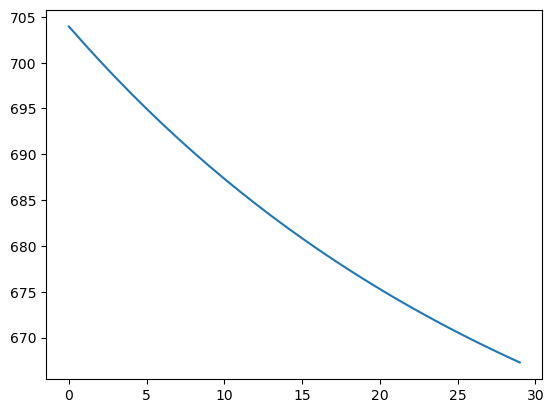

In [ ]:
print(len(lst_output))
units = pred_list
begin_date = '2021-4-30'

df = pd.DataFrame({'Date':pd.date_range(begin_date, periods=len(units)),
                   'Close':units,
                   })
df = df.sort_values('Date')
df = df.groupby('Date')['Close'].sum().reset_index()
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
print (df.head(10))

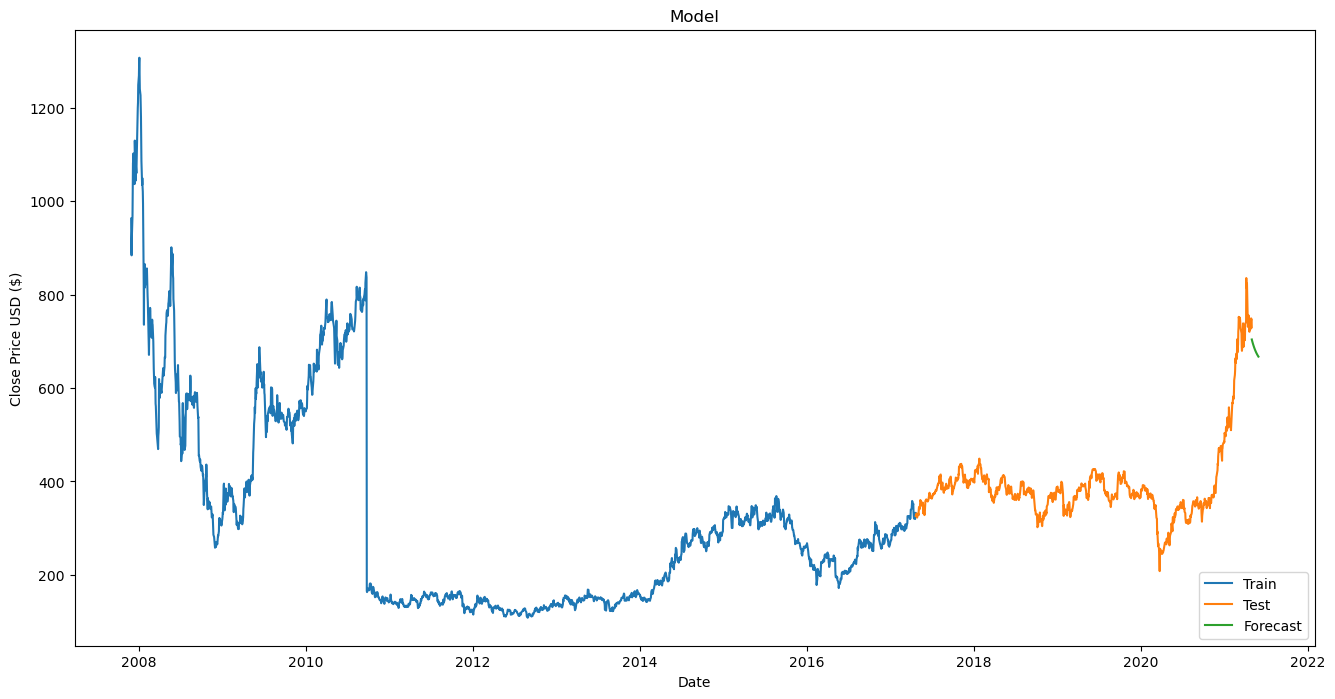

In [ ]:
#spilt the dataset
# Importing the Dataset.
stock=pd.read_csv("dataset.csv")
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')
cols = ['Symbol','Series','Prev Close','Open','High', 'Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')
stock = stock.groupby('Date')['Close'].sum().reset_index()
stock = stock.set_index('Date')
stock.index = pd.to_datetime(stock.index)
monthly_mean = stock.Close.resample('M').mean()
# Checking the data.
stock.head()
train_data, test_data = stock[0:int(len(stock)*0.7)], stock[int(len(stock)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

data = stock.filter(['Close'])
train = data[:int(len(stock)*0.7)]
test = data[int(len(stock)*0.7):]
pred = df['Close']
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(test)
plt.plot(pred)
plt.legend(['Train', 'Test','Forecast'], loc='lower right')
plt.show()

In [106]:
import matplotlib
import numpy as np
diff=120
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
stock=pd.read_csv("dataset.csv")
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')
cols = ['Symbol','Series','Prev Close','Open','High', 'Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')
stock = stock.groupby('Date')['Close'].sum().reset_index()
stock = stock.set_index('Date')
stock.index = pd.to_datetime(stock.index)
monthly_mean = stock.Close.resample('M').mean()
train_data, test_data = stock[0:int(len(stock)*0.7)], stock[int(len(stock)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
data = stock.filter(['Close'])
train = data[:int(len(stock)*0.8)]
test = data[int(len(stock)*0.8):]


Date
2021-05-01    479.386419
2021-05-02    201.590230
2021-05-03    213.922595
2021-05-04    221.292471
2021-05-05    216.107089
2021-05-06    217.028734
2021-05-07    226.109438
2021-05-08    225.541794
2021-05-09    217.429239
2021-05-10    213.117431
2021-05-11    193.465946
2021-05-12    219.643513
2021-05-13    220.835564
2021-05-14    228.868001
2021-05-15    233.754110
2021-05-16    233.393888
2021-05-17    235.481709
2021-05-18    233.682795
2021-05-19    254.669250
2021-05-20    248.698751
2021-05-21    249.472325
2021-05-22    246.692224
2021-05-23    264.542067
2021-05-24    267.128184
2021-05-25    257.998101
2021-05-26    261.367726
2021-05-27    287.682807
2021-05-28    286.962190
Name: Close, dtype: float64


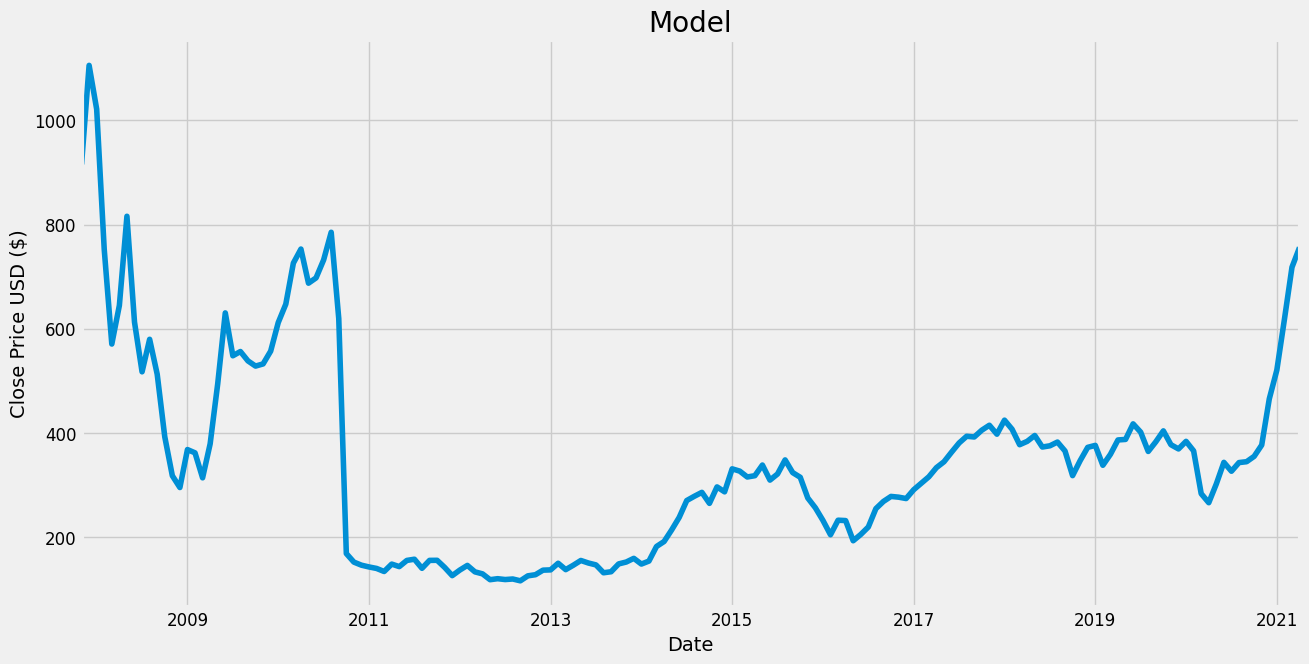

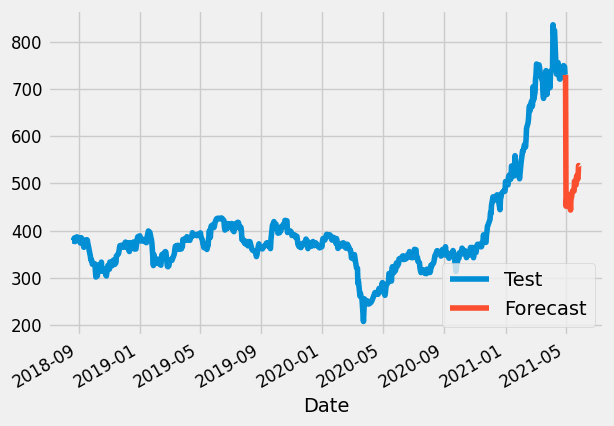

In [111]:
pred=[729.3864185390357, 451.5902298917682, 463.9225949646983, 471.29247134920473, 466.10708861907466, 
      467.02873438177267, 476.1094379151973, 475.541793762302, 467.42923918393313, 463.11743097199707, 
      443.46594566319465, 469.6435127618432, 470.83556378325324, 478.86800051822627, 483.75411007622733,
      483.39388842212753, 485.4817092389624, 483.6827948131647, 504.6692502987712, 498.69875121702097, 
      499.47232547184535, 496.6922235732663, 514.5420673021255, 517.1281843873444, 507.9981005754857, 
      511.3677256165924, 537.6828071261938, 536.9621901804622]
units = pred
new_list = [x+150 for x in pred]
begin_date = '2021-5-1'
pred_df=pd.DataFrame({'Date':pd.date_range(begin_date, periods=len(units)),
                   'Close':units,'pred':new_list
                   })
pred_df = pred_df.sort_values('Date')
pred_df = pred_df.set_index('Date')

train_data, test_data = stock[0:int(len(stock)*0.7)], stock[int(len(stock)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
data = stock.filter(['Close'])
train = data[:int(len(stock)*0.8)]
test = data[int(len(stock)*0.8):]
pred = pred_df['Close']
plt.figure(figsize=(14,7))
ax = monthly_mean.plot(label='observed', figsize=(14, 7))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
test.plot(label='Test')
ax.fill_between(pred_df.index,
                pred_df.iloc[:, 0]-diff1,
                pred_df.iloc[:, 1]-diff2, color='k', alpha=.2)
print(pred_df.iloc[:, 0]-diff1)

pred.plot(label='Forecast')

plt.legend(['Test','Forecast'], loc='lower right')
plt.show()